### Entropy  

Measures randomeness of a system  
  
H(S) = -Σ P<sub>c</sub> log<sub>2</sub>(P<sub>c</sub>)     

P<sub>c</sub> -> prob. of class C
  
// maxm when prob. is 0.5  
  
### Information Gain  
  
Weighted decrease in entropy
  
Information Gain when set S is split about attribute A  

IG(S, A) = H(S) - Σ (|S<sub>v</sub>| / |S|) * H(S<sub>v</sub>)    

// S<sub>v</sub> is the new set

#### Goal of Decision Tree -> Maximise info. gain or reduce entropy

In [1]:
import numpy as np
import pandas as pd

In [69]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head(n = 10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Preprocessing Data

- Dropping features that are not useful
- Data Imputation

In [5]:
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked']

In [6]:
data_clean = data.drop(columns_to_drop, axis = 1)

In [7]:
data_clean.head(n = 10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,NaN,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
data_clean['Sex'] = le.fit_transform(data_clean['Sex'])

In [10]:
data_clean

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [11]:
sex_enc = {
    'male': 1,
    'female': 0
}

In [12]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [13]:
data_clean = data_clean.fillna(data_clean['Age'].mean())

In [14]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 48.9 KB


In [15]:
# from sklearn.preprocessing import SimpleImputer
# imp = Imputer(missing_values = np.nan, strategy = 'mean')
# data_clean = pd.DataFrame(imp.fit_transform(data_clean))

In [16]:
data_clean.loc[1]

Survived     1.0000
Pclass       1.0000
Sex          0.0000
Age         38.0000
SibSp        1.0000
Parch        0.0000
Fare        71.2833
Name: 1, dtype: float64

In [17]:
input_cols = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [18]:
output_cols = ['Survived']

In [19]:
X = data_clean[input_cols]
Y = data_clean[output_cols]

print(X.shape, Y.shape)

(891, 6) (891, 1)


### Implement ntropy and Information Gain

In [20]:
def entropy(col) :
    
    counts = np.unique(col, return_counts = True)
    # (np.array(all unique values), np.array(respective counts))
    
    N = float(col.shape[0])
    
    ent = 0.0
    
    for ix in counts[1] :
        prob = ix / N
        ent += (-1.0 * prob * np.log2(prob))
        
    return ent

In [21]:
def divide_data(x_data, fkey, fval) :
# Work directly with Pandas Dataframe

    x_left = pd.DataFrame([], columns = x_data.columns)
    x_right = pd.DataFrame([], columns = x_data.columns)
    
    for ix in range(x_data.shape[0]) :
        val = x_data[fkey].loc[ix]
        
        if val > fval :
            x_right = x_right.append(x_data.loc[ix])
        else :
            x_left = x_left.append(x_data.loc[ix])
            
    return x_left, x_right

In [22]:
def infoGain(x_data, fkey, fval) :
# fkey is column, and fval is threshold value for split
     
    left, right = divide_data(x_data, fkey, fval)
    
    l = float(left.shape[0]) / x_data.shape[0]
    r = float(right.shape[0]) / x_data.shape[0]
    
    if left.shape[0] == 0 or right.shape[0] == 0 :
        return -1000000 # Min info. gain, the result does not depend on that attribute, can return 0 as well
    
    i_gain = entropy(x_data.Survived) - (l * entropy(left.Survived) + r * entropy(right.Survived))
    return i_gain

In [23]:
for fx in X.columns :
    print(fx)
    print(infoGain(data_clean, fx, data_clean[fx].mean()))

Pclass
0.07579362743608165
Sex
0.2176601066606142
Age
0.0008836151229467681
SibSp
0.009584541813400071
Parch
0.015380754493137694
Fare
0.042140692838995464


### Implement Decision Tree

To prevent overfitting  
- Early stopping
- Post pruning

In [24]:
class DecisionTree :
    
    def __init__(self, depth = 0, max_depth = 5) : # depth is current depth
        self.left = None
        self.right = None
        self.fkey = None
        self.fval = None
        self.depth = depth
        self.max_depth = max_depth
        self.target = None # Majority prediction for that node
       
    
    def train(self, X_train) :
        
        features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
        info_gains = []
        
        for ix in features :
            i_gain = infoGain(X_train, ix, X_train[ix].mean())
            info_gains.append(i_gain)
            
        self.fkey = features[np.argmax(info_gains)]
        self.fval = X_train[self.fkey].mean()
        
        print('Building Tree with the feature for splitting being', self.fkey)
        
        data_left, data_right = divide_data(X_train, self.fkey, self.fval)
        data_left = data_left.reset_index(drop = True)
        data_right = data_right.reset_index(drop = True)
        
        if X_train.Survived.mean() >= 0.5 :
            self.target = "Survived"
        else :
            self.target = "Dead"

        # truly leaf node
        if data_left.shape[0] == 0 or data_right.shape[0] == 0 :
            return
                
        # stop early when depth >= max_depth
        if self.depth >= self.max_depth :
            return
        
        self.left = DecisionTree(depth = self.depth + 1, max_depth = self.max_depth)
        self.left.train(data_left)
        
        self.right = DecisionTree(depth = self.depth + 1, max_depth = self.max_depth)
        self.right.train(data_right)
        
        
    def predict(self, test) :
        
        if test[self.fkey] > self.fval :
            # go to right
            if self.right is None :
                return self.target
            else :
                return self.right.predict(test)
            
        else :
            # go to left
            if self.left is None :
                return self.target
            else :
                return self.left.predict(test)

### Split dataset into Train, Validation, and Test

In [25]:
split = int(0.7 * data_clean.shape[0])

train_data = data_clean[ : split]
test_data = data_clean[split : ]
test_data = test_data.reset_index(drop = True)

In [26]:
print(train_data.shape, test_data.shape)

(623, 7) (268, 7)


In [27]:
dt = DecisionTree()
dt.train(train_data)

Building Tree with the feature for splitting being Sex
Building Tree with the feature for splitting being Pclass
Building Tree with the feature for splitting being Age
Building Tree with the feature for splitting being SibSp
Building Tree with the feature for splitting being Pclass
Building Tree with the feature for splitting being Age
Building Tree with the feature for splitting being Age
Building Tree with the feature for splitting being SibSp
Building Tree with the feature for splitting being Parch
Building Tree with the feature for splitting being Pclass
Building Tree with the feature for splitting being SibSp
Building Tree with the feature for splitting being Fare
Building Tree with the feature for splitting being Parch
Building Tree with the feature for splitting being Age
Building Tree with the feature for splitting being Pclass
Building Tree with the feature for splitting being Age
Building Tree with the feature for splitting being Age
Building Tree with the feature for splitti

In [28]:
print(dt.fkey, dt.fval)

Sex 0.6292134831460674


In [29]:
print(dt.left.fkey, dt.left.fval)
print(dt.right.fkey, dt.right.fval)

Pclass 2.1774891774891776
Fare 25.149456377551026


In [30]:
y_pred = []

for ix in range(test_data.shape[0]) :
    y_pred.append(dt.predict(test_data.loc[ix]))

In [31]:
y_actual = test_data[output_cols]
print(y_actual)

     Survived
0           0
1           0
2           0
3           0
4           1
..        ...
263         0
264         1
265         0
266         1
267         0

[268 rows x 1 columns]


In [32]:
le = LabelEncoder()
y_pred = np.array(le.fit_transform(y_pred)).reshape((-1, 1))

In [33]:
y_pred

array([[0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [34]:
acc = np.sum(y_pred == y_actual) / y_pred.shape[0]
print(acc)

Survived    0.817164
dtype: float64


### Using Sklearn

In [35]:
from sklearn.tree import DecisionTreeClassifier

In [36]:
sk_tree = DecisionTreeClassifier(criterion = 'gini', max_depth=3)

In [37]:
sk_tree.fit(train_data[input_cols], train_data[output_cols])

DecisionTreeClassifier(max_depth=3)

In [38]:
sk_tree.predict(test_data[input_cols])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0])

In [39]:
sk_tree.score(test_data[input_cols], test_data[output_cols])

0.832089552238806

### Visualise a Decision Tree

In [40]:
# import pydotplus
# from sklearn.externals.six import StringIO
# from IPython.display import Image
# from sklearn.tree import export_graphviz

In [41]:
# dot_data = StringIO()
# export_graphviz(sk_tree, out_file = dot_data, filled = True, rounded = True)

In [42]:
# graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# Image(graph.create_png())

## Random Forest

In [43]:
X_train = train_data[input_cols]
Y_train = np.array(train_data[output_cols]).reshape((-1, 1))
X_test = test_data[input_cols]
Y_test = np.array(test_data[output_cols]).reshape((-1, 1))

In [51]:
sk_tree = DecisionTreeClassifier(criterion='entropy')
sk_tree.fit(X_train, Y_train)
print(sk_tree.score(X_train, Y_train))

0.9823434991974318


In [52]:
print(sk_tree.score(X_test, Y_test))

0.7798507462686567


In [53]:
sk_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
sk_tree.fit(X_train, Y_train)
print(sk_tree.score(X_train, Y_train))

0.8443017656500803


In [54]:
print(sk_tree.score(X_test, Y_test))

0.8283582089552238


In [56]:
# Training Random Forest Classifier

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rf = RandomForestClassifier(n_estimators=10, criterion='entropy')

In [72]:
rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [73]:
print(rf.score(X_train, Y_train))

0.9598715890850722


In [74]:
print(rf.score(X_test, Y_test))

0.8171641791044776


In [75]:
rf = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=5)
rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=10)

In [76]:
print(rf.score(X_train, Y_train))

0.85553772070626


In [77]:
print(rf.score(X_test, Y_test))

0.8246268656716418


In [78]:
# Cross Validation score

In [79]:
from sklearn.model_selection import cross_val_score

In [98]:
accuracy = cross_val_score(RandomForestClassifier(n_estimators=20, max_depth=5, criterion='entropy'), X_train, Y_train, cv=5).mean()

In [99]:
print(accuracy * 100)

81.53806451612903


In [100]:
acc_list = []
for i in range(1, 100) :
    acc = cross_val_score(RandomForestClassifier(n_estimators=i, max_depth=5, criterion='entropy'), X_train, Y_train, cv=5).mean()
    acc_list.append(acc)

In [101]:
import matplotlib.pyplot as plt

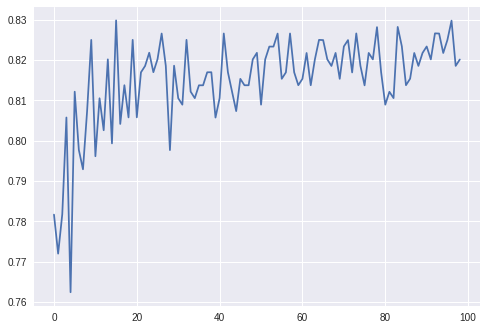

In [103]:
plt.style.use('seaborn')
plt.plot(acc_list)
plt.show()

In [104]:
print(np.argmax(acc_list) + 1)

16


In [126]:
rf = RandomForestClassifier(n_estimators=16, criterion='entropy', max_depth=5)

In [127]:
rf.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=16)

In [128]:
print(rf.score(X_train, Y_train))

0.85553772070626


In [129]:
print(rf.score(X_test, Y_test))

0.8246268656716418
